In [1]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install graphviz
!pip install pydotplus
!pip install scikit-plot
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #Для разделения данных на тренировочную и тестовую часть
from sklearn.tree import DecisionTreeClassifier #Импортируем классификатор, который будем использовать
from sklearn.model_selection import GridSearchCV, cross_val_score  # Перебор комбинаций параметров дерева

from sklearn import metrics # метрики точности классификации
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import roc_auc_score
    
import seaborn as sns # Визуализация
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc # Roc кривая
from matplotlib.pylab import rc, plot
import itertools   
import scikitplot as skplt 


# используем .dot формат для визуализации дерева
from sklearn.tree import plot_tree



In [3]:
# Импорт Данных
df = pd.read_excel('./CardiologyCategorical_post.xlsx') 
df.rename(columns={"chest pain type": "chest_pain_type", "blood pressure": "blood_pressure", "Fasting blood sugar <120" : 'Fasting_blood_sugar_<120', 'resting ecg': 'resting_ecg', 'maximum heart rate' : 'maximum_heart_rate', '#colored vessels' : 'colored_vessels'}, inplace=True)

# Подготовка Данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       303 non-null    int64  
 1   sex                       303 non-null    int64  
 2   chest_pain_type           303 non-null    int64  
 3   blood_pressure            303 non-null    int64  
 4   cholesterol               303 non-null    int64  
 5   Fasting_blood_sugar_<120  303 non-null    int64  
 6   resting_ecg               303 non-null    int64  
 7   maximum_heart_rate        303 non-null    int64  
 8   angina                    303 non-null    int64  
 9   peak                      303 non-null    float64
 10  slope                     303 non-null    int64  
 11  colored_vessels           303 non-null    int64  
 12  thal                      303 non-null    int64  
 13  class                     303 non-null    int64  
dtypes: float64

In [5]:
df.dropna(inplace=True) # Очистка пропущенных значений
df.shape # Размерность матрицы 

(303, 14)

In [6]:
df['chest_pain_type'].value_counts()

0    143
3     87
1     49
2     24
Name: chest_pain_type, dtype: int64

In [7]:
df.head()

,age,sex,chest_pain_type,blood_pressure,cholesterol,Fasting_blood_sugar_<120,resting_ecg,maximum_heart_rate,angina,peak,slope,colored_vessels,thal,class
0,60,1,0,130,206,0,0,132,1,2.4,0,2,0,0
1,49,1,2,130,266,0,1,171,0,0.6,1,0,1,1
2,64,1,1,110,211,0,0,144,1,1.8,0,0,1,1
3,63,1,0,130,254,0,0,147,0,1.4,0,1,0,0
4,53,1,0,140,203,1,0,155,1,3.1,2,0,0,0


# Label Encoding


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       303 non-null    int64  
 1   sex                       303 non-null    int64  
 2   chest_pain_type           303 non-null    int64  
 3   blood_pressure            303 non-null    int64  
 4   cholesterol               303 non-null    int64  
 5   Fasting_blood_sugar_<120  303 non-null    int64  
 6   resting_ecg               303 non-null    int64  
 7   maximum_heart_rate        303 non-null    int64  
 8   angina                    303 non-null    int64  
 9   peak                      303 non-null    float64
 10  slope                     303 non-null    int64  
 11  colored_vessels           303 non-null    int64  
 12  thal                      303 non-null    int64  
 13  class                     303 non-null    int64  
dtypes: float64

In [9]:
df.head()

,age,sex,chest_pain_type,blood_pressure,cholesterol,Fasting_blood_sugar_<120,resting_ecg,maximum_heart_rate,angina,peak,slope,colored_vessels,thal,class
0,60,1,0,130,206,0,0,132,1,2.4,0,2,0,0
1,49,1,2,130,266,0,1,171,0,0.6,1,0,1,1
2,64,1,1,110,211,0,0,144,1,1.8,0,0,1,1
3,63,1,0,130,254,0,0,147,0,1.4,0,1,0,0
4,53,1,0,140,203,1,0,155,1,3.1,2,0,0,0


# Разбиение данных на Обучающую и тестовую часть

In [10]:
# Разбиение на параметры объектов и целевой класс
y = df['class'] # известные значения целевого класса
X = df.drop('class', axis = 1) # Параметры объекта

In [11]:
# Разбиение обучающую и тестовую выборку с использованием стратификацию по целевому классу 
X_train, X_holdout, y_train, y_holdout,  = train_test_split(X, y, test_size=0.3,
                                                          random_state=10, stratify=y) 

In [12]:
# Размерности обучающей и тетстовой выборки
X_train.shape, X_holdout.shape, y_train.shape, y_holdout.shape

((212, 13), (91, 13), (212,), (91,))

In [13]:
tree = DecisionTreeClassifier(random_state=10) # Дерево решений со стандартными параметрами

In [14]:
%%time
tree.fit(X_train, y_train)

Wall time: 3 ms


DecisionTreeClassifier(random_state=10)

In [15]:
# Оценки Дерева решений со стандартными гиперпараметрами на кроссвалидации
print(cross_val_score(tree, X_train, y_train, cv=10))

[0.68181818 0.77272727 0.61904762 0.80952381 0.61904762 0.95238095
 0.76190476 0.61904762 0.57142857 0.80952381]


In [16]:
# Оценки Дерева решений со стандартными гиперпараметрами на отложенной выборке 
print(metrics.accuracy_score(y_holdout, tree.predict(X_holdout)))

0.8241758241758241


In [17]:
# Подбор гиперпараметров Дерева решений
tree_params = {'criterion': ('gini', "entropy"), 
               'min_samples_leaf': range(1,15),'max_depth': range(1,10)} 
tree_grid = GridSearchCV(tree, tree_params,
                         cv=10, n_jobs=-1,
                        verbose=True) 

In [18]:
%%time
tree_grid.fit(X_train, y_train)

Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 464 tasks      | elapsed:    2.5s


Wall time: 3.93 s


[Parallel(n_jobs=-1)]: Done 2450 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed:    3.8s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=10),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 15)},
             verbose=True)

In [19]:
tree_grid.best_estimator_ # Оптимальные гиперпараметры

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=11,
                       random_state=10)

In [20]:
# Значения Дерева решений со Опитимальными гиперпараметрами на отложенной выборке 
(cross_val_score(tree_grid.best_estimator_, X_train, y_train, cv=10)) # Оценка точности на кроссвалиждации 10х


array([0.77272727, 0.81818182, 0.61904762, 0.85714286, 0.66666667,
       0.95238095, 0.85714286, 0.9047619 , 0.71428571, 0.9047619 ])

In [21]:
metrics.accuracy_score(y_holdout, tree_grid.best_estimator_.predict(X_holdout)) 

0.8351648351648352

In [22]:
#Предсказываем
y_pred=tree_grid.best_estimator_.predict(X_holdout)

### Характеристики бинарного классификатора
Основываясь на данной таблице, можно ввести несколько величин, характеризующих бинарный классификатор:
$$rec = TPR = \frac{TP}{TP + FN},\quad SPC = \frac{TN}{TN + FP},\quad prec = PPV = \frac{TP}{TP + FP},\quad FPR = 1 - SPC,$$

$$ACC = \frac{TP + TN}{TP + TN + FP + FN},\quad F1 = 2\frac{PPV\cdot TRP}{PPV + TPR}.$$

Полнота $TPR$ (True positive rate, recall, sensitivity) - доля верно классифицированных положительных примеров среди всех положительных примеров.

Специфичность $SPC$ (Specificity, true negative rate) - доля верно классифицированных отрицательных примеров среди всех отрицательных примеров.

Точность $PPV$ (Positive predictive value, precision) - доля верно классифицированных положительных примеров среди всех примеров, классифицированных положительно.

$FPR$ (False positive rate) - доля ошибочно классифицированных отрицательных примеров среди всех отрицательных примеров.

$ACC$ (Accuracy) - доля верно классифицированных примеров среди всех примеров. Основная характеристика качества классификации.

$F1$ (F1-measure) - среднее гармоническое точности и полноты. Позволяет учесть обе характеристики одновременно.



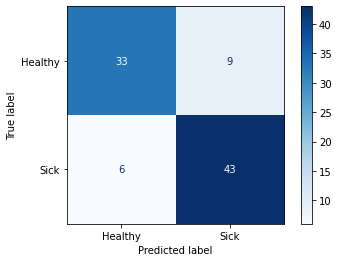

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        42
           1       0.83      0.88      0.85        49

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91

Accuracy: 0.8351648351648352


In [23]:
#оценка точности, матрицы ощибок и отчет о классификации
plot_confusion_matrix(tree_grid.best_estimator_, X_holdout, y_holdout, cmap = plt.cm.Blues, display_labels = ['Healthy', 'Sick'] )
plt.show() # Матрица ошибок на отложенных даннных

result1 = classification_report(y_holdout, y_pred) # Оценка точности на отложенных даннных
print("Classification Report:",)
print (result1)

result2 = accuracy_score(y_holdout,y_pred) # Оценка точности на отложенных даннных
print("Accuracy:",result2)

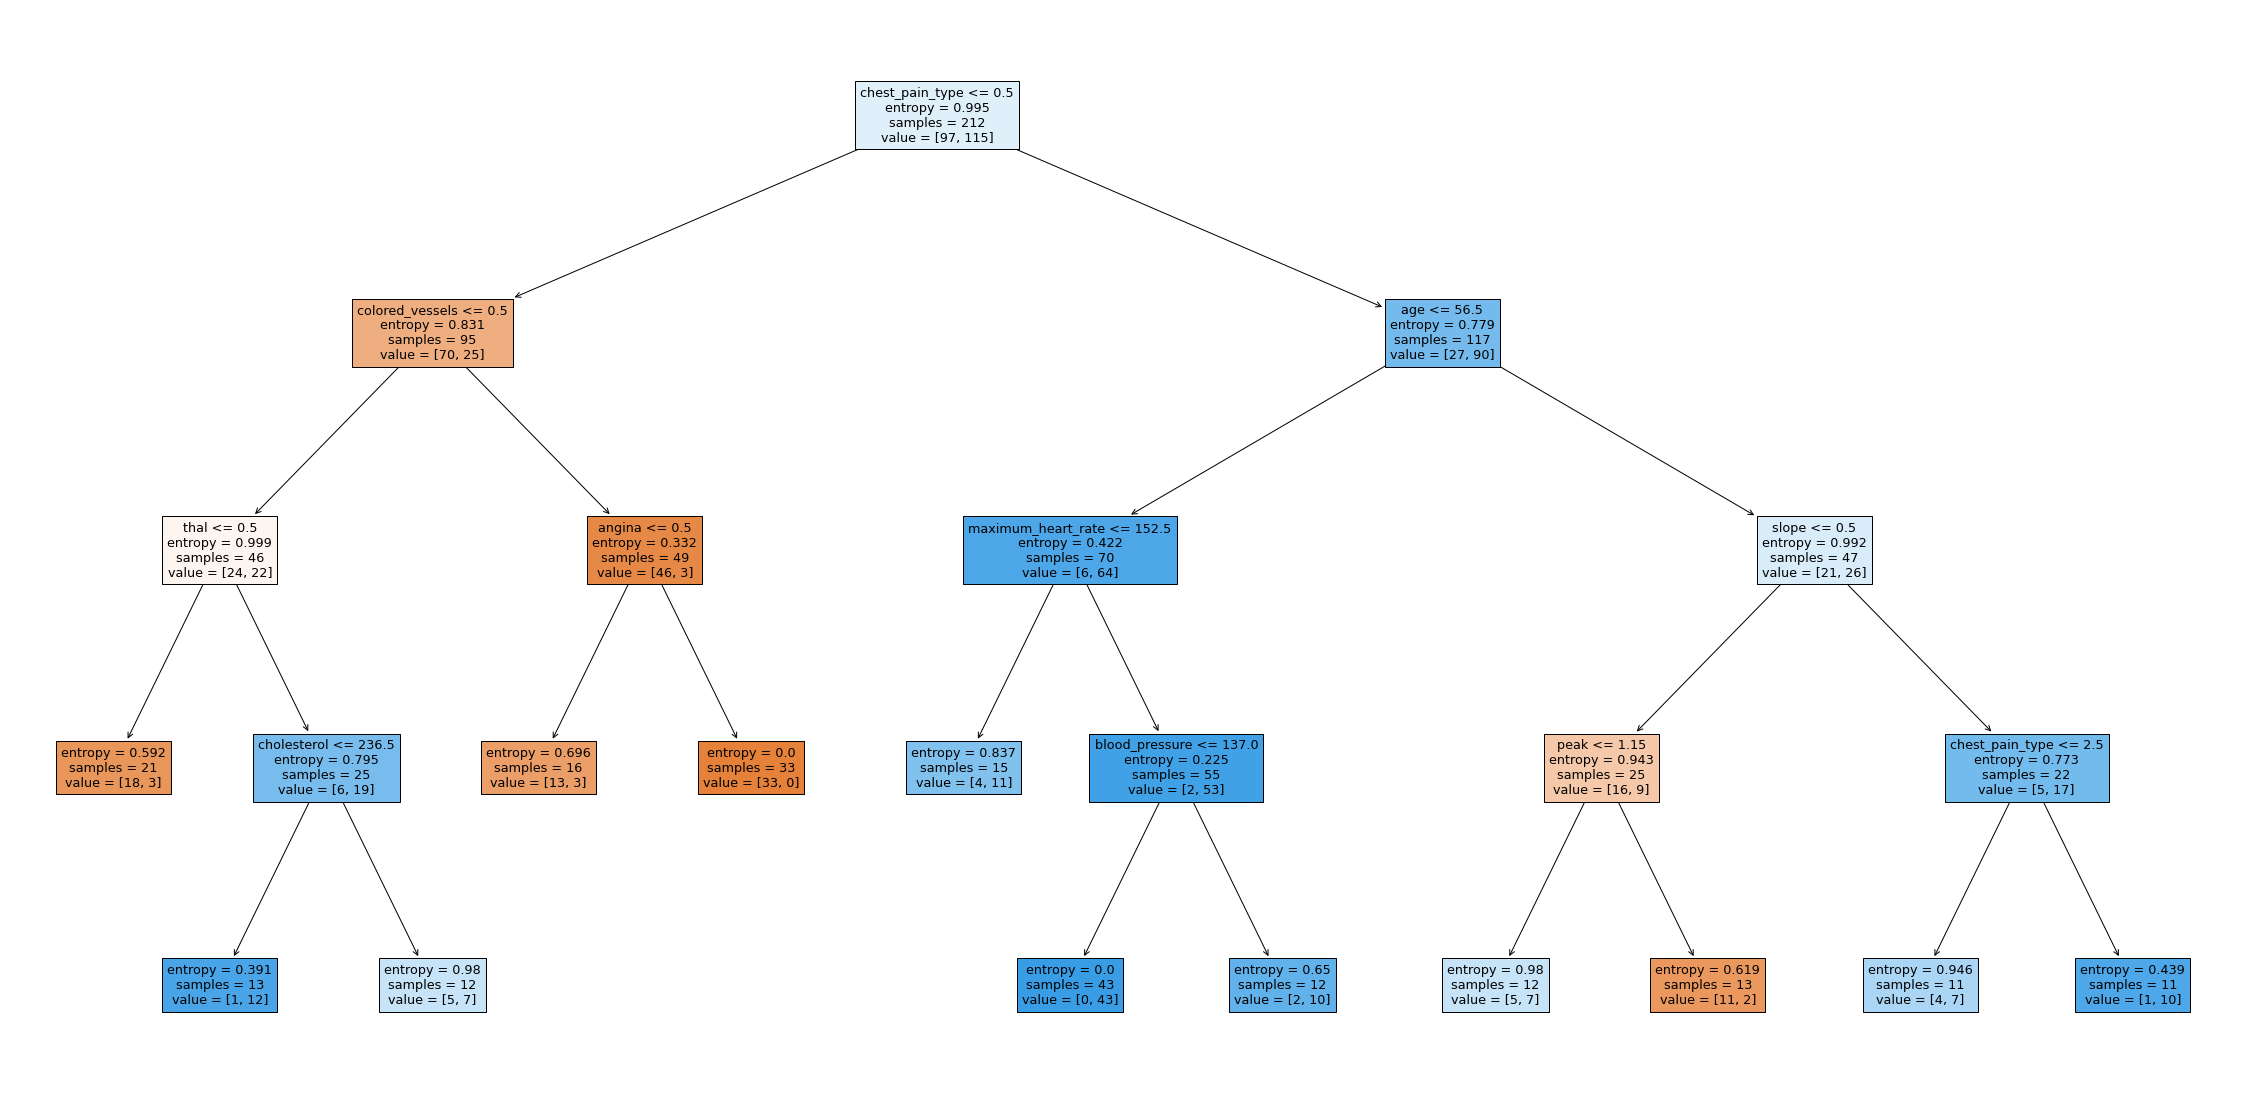

In [24]:
# Визуализация дерева решений без Graphviz
plt.figure(figsize=(40,20))
plot_tree(tree_grid.best_estimator_, feature_names=X.columns, filled=True)
plt.show()

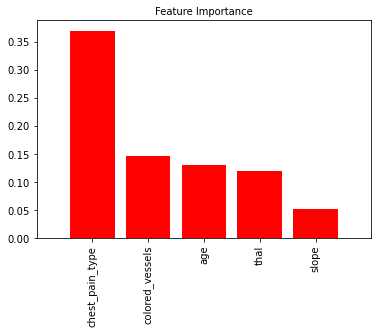

In [25]:
# Значения важности признаков
skplt.estimators.plot_feature_importances(tree_grid.best_estimator_, title='Feature Importance', feature_names=X_holdout.columns, 
                                          max_num_features=5, 
                                          order='descending', x_tick_rotation=90,
                                          ax=None, figsize=None, title_fontsize='medium', text_fontsize='medium')

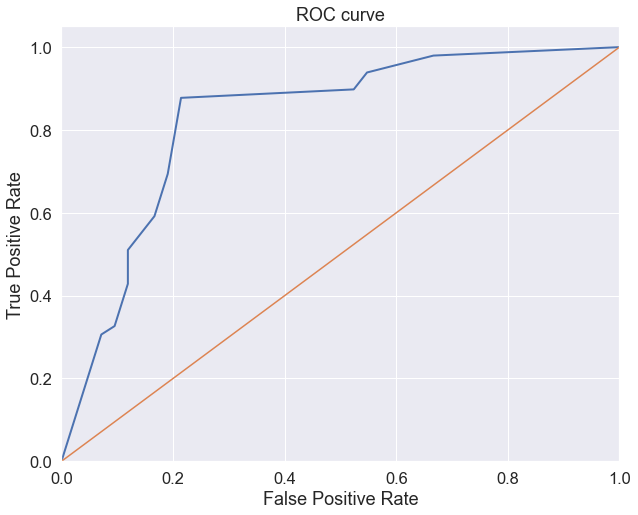

0.8284742468415938


In [72]:
# ROC кривая на графике

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_holdout, tree_grid.best_estimator_.predict_proba(X_holdout)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()


# ROC AUC score Оценка 
y_score = tree_grid.best_estimator_.predict_proba(X_holdout)[:,1]
print(roc_auc_score(y_holdout, y_score))

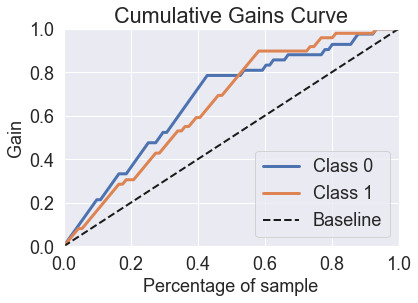

In [27]:
# Gain-кривая
skplt.metrics.plot_cumulative_gain(y_holdout, tree_grid.best_estimator_.predict_proba(X_holdout))

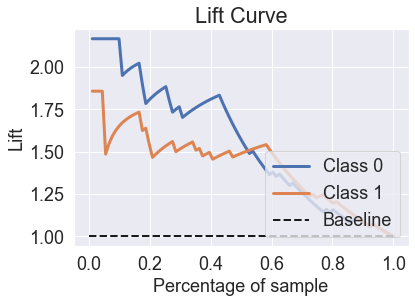

In [28]:
# Lift-кривая
skplt.metrics.plot_lift_curve(y_holdout, tree_grid.best_estimator_.predict_proba(X_holdout))

In [102]:
y_pred = (tree_grid.best_estimator_.predict_proba(X_holdout)[:,1] >= 0.3 )

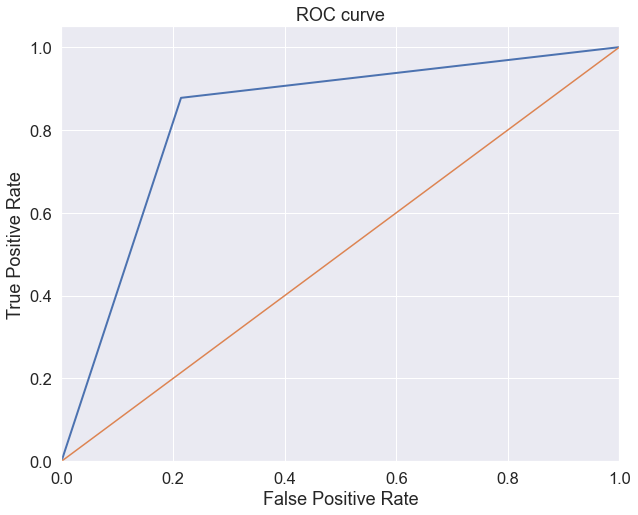

0.8284742468415938


In [103]:
# ROC кривая на графике

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_holdout, y_pred, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()


# ROC AUC score Оценка 
y_score = tree_grid.best_estimator_.predict_proba(X_holdout)[:,1]
print(roc_auc_score(y_holdout, y_score))

In [ ]:
#оценка точности, матрицы ощибок и отчет о классификации
plot_confusion_matrix(tree_grid.best_estimator_, X_holdout, y_holdout, cmap = plt.cm.Blues, display_labels = ['Healthy', 'Sick'] )
plt.show() # Матрица ошибок на отложенных даннных

result1 = classification_report(y_holdout, y_pred) # Оценка точности на отложенных даннных
print("Classification Report:",)
print (result1)

result2 = accuracy_score(y_holdout,y_pred) # Оценка точности на отложенных даннных
print("Accuracy:",result2)
